Name: Sagar Bhetwal  
Course: MSCS 634  
Lab: Lab 1 – Data Visualization, Preprocessing, and Statistical Analysis

In [1]:
print("Jupyter is working!")

Jupyter is working!


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = sns.load_dataset("titanic")
df.to_csv("titanic.csv", index=False)  
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


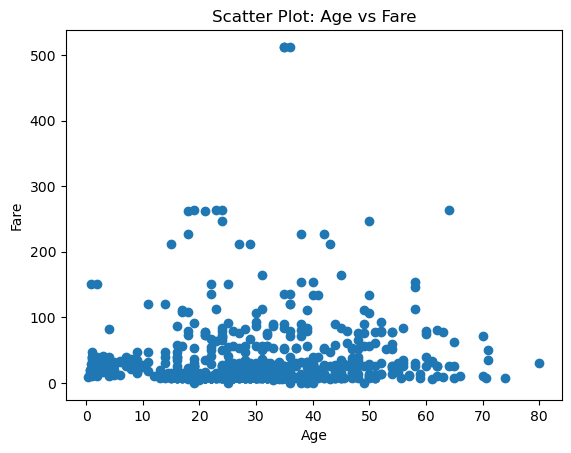

In [5]:
plt.figure()
plt.scatter(df["age"], df["fare"])
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Scatter Plot: Age vs Fare")
plt.show()

Insight: Fare has some extreme high values (outliers). Age does not show a strong direct relationship with fare.

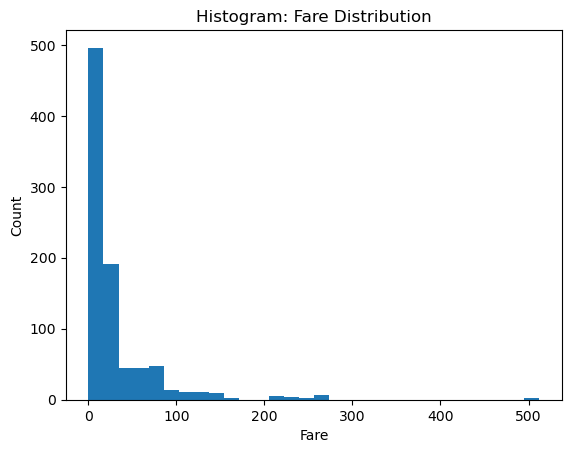

In [6]:
plt.figure()
plt.hist(df["fare"].dropna(), bins=30)
plt.xlabel("Fare")
plt.ylabel("Count")
plt.title("Histogram: Fare Distribution")
plt.show()

Insight: Fare is right-skewed: most passengers paid lower fares, while a small number paid very high fares.

In [7]:
df.isna().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [8]:
df[["age", "embarked", "deck", "fare"]].head(10)

,age,embarked,deck,fare
0,22.0,S,NaN,7.2500
1,38.0,C,C,71.2833
2,26.0,S,NaN,7.9250
3,35.0,S,C,53.1000
4,35.0,S,NaN,8.0500
5,NaN,Q,NaN,8.4583
6,54.0,S,E,51.8625
7,2.0,S,NaN,21.0750
8,27.0,S,NaN,11.1333
9,14.0,C,NaN,30.0708


In [9]:
df_missing_fixed = df.copy()

df_missing_fixed["age"] = df_missing_fixed["age"].fillna(df_missing_fixed["age"].median())
df_missing_fixed["embarked"] = df_missing_fixed["embarked"].fillna(df_missing_fixed["embarked"].mode()[0])
df_missing_fixed = df_missing_fixed.drop(columns=["deck"])

df_missing_fixed[["age", "embarked", "fare"]].head(10)

,age,embarked,fare
0,22.0,S,7.2500
1,38.0,C,71.2833
2,26.0,S,7.9250
3,35.0,S,53.1000
4,35.0,S,8.0500
5,28.0,Q,8.4583
6,54.0,S,51.8625
7,2.0,S,21.0750
8,27.0,S,11.1333
9,14.0,C,30.0708


In [10]:
Q1 = df_missing_fixed["fare"].quantile(0.25)
Q3 = df_missing_fixed["fare"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

Q1, Q3, IQR, lower_bound, upper_bound

(np.float64(7.9104),
 np.float64(31.0),
 np.float64(23.0896),
 np.float64(-26.724),
 np.float64(65.6344))

In [11]:
outliers = df_missing_fixed[(df_missing_fixed["fare"] < lower_bound) | (df_missing_fixed["fare"] > upper_bound)]
outliers[["fare", "age", "pclass", "survived"]].head(10), outliers.shape

(         fare   age  pclass  survived
 1     71.2833  38.0       1         1
 27   263.0000  19.0       1         0
 31   146.5208  28.0       1         1
 34    82.1708  28.0       1         0
 52    76.7292  49.0       1         1
 61    80.0000  38.0       1         1
 62    83.4750  45.0       1         0
 72    73.5000  21.0       2         0
 88   263.0000  23.0       1         1
 102   77.2875  21.0       1         0,
 (116, 14))

In [12]:
df_no_outliers = df_missing_fixed[(df_missing_fixed["fare"] >= lower_bound) & (df_missing_fixed["fare"] <= upper_bound)].copy()

df_missing_fixed.shape, df_no_outliers.shape

((891, 14), (775, 14))

In [13]:
df_no_outliers.shape, df_no_outliers.head()

((775, 14),
    survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
 0         0       3    male  22.0      1      0   7.2500        S  Third   
 2         1       3  female  26.0      0      0   7.9250        S  Third   
 3         1       1  female  35.0      1      0  53.1000        S  First   
 4         0       3    male  35.0      0      0   8.0500        S  Third   
 5         0       3    male  28.0      0      0   8.4583        Q  Third   
 
      who  adult_male  embark_town alive  alone  
 0    man        True  Southampton    no  False  
 2  woman       False  Southampton   yes   True  
 3  woman       False  Southampton   yes  False  
 4    man        True  Southampton    no   True  
 5    man        True   Queenstown    no   True  )

In [14]:
df_sampled = df_no_outliers.sample(frac=0.30, random_state=42)
df_sampled.shape

(232, 14)

In [15]:
cols_to_drop = ["alive", "adult_male", "who", "embark_town", "class"]
df_reduced = df_sampled.drop(columns=cols_to_drop, errors="ignore")

df_reduced.shape, df_reduced.head()

((232, 9),
      survived  pclass     sex   age  sibsp  parch     fare embarked  alone
 493         0       1    male  71.0      0      0  49.5042        C   True
 821         1       3    male  27.0      0      0   8.6625        S   True
 381         1       3  female   1.0      0      2  15.7417        C  False
 881         0       3    male  33.0      0      0   7.8958        S   True
 420         0       3    male  28.0      0      0   7.8958        C   True)

In [16]:
df_reduced[["age", "fare"]].head()

,age,fare
493,71.0,49.5042
821,27.0,8.6625
381,1.0,15.7417
881,33.0,7.8958
420,28.0,7.8958


In [17]:
df_scaled = df_reduced.copy()

fare_min = df_scaled["fare"].min()
fare_max = df_scaled["fare"].max()
df_scaled["fare_scaled"] = (df_scaled["fare"] - fare_min) / (fare_max - fare_min)

df_scaled[["fare", "fare_scaled"]].head()

,fare,fare_scaled
493,49.5042,0.761603
821,8.6625,0.133269
381,15.7417,0.242180
881,7.8958,0.121474
420,7.8958,0.121474


In [18]:
bins = [0, 12, 19, 35, 60, 120]
labels = ["Child", "Teen", "YoungAdult", "Adult", "Senior"]

df_scaled["age_group"] = pd.cut(df_scaled["age"], bins=bins, labels=labels)

df_scaled[["age", "age_group"]].head(10)

,age,age_group
493,71.0,Senior
821,27.0,YoungAdult
381,1.0,Child
881,33.0,YoungAdult
420,28.0,YoungAdult
623,21.0,YoungAdult
850,4.0,Child
241,28.0,YoungAdult
133,29.0,YoungAdult
599,49.0,Adult


In [19]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 232 entries, 493 to 718
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     232 non-null    int64   
 1   pclass       232 non-null    int64   
 2   sex          232 non-null    object  
 3   age          232 non-null    float64 
 4   sibsp        232 non-null    int64   
 5   parch        232 non-null    int64   
 6   fare         232 non-null    float64 
 7   embarked     232 non-null    object  
 8   alone        232 non-null    bool    
 9   fare_scaled  232 non-null    float64 
 10  age_group    232 non-null    category
dtypes: bool(1), category(1), float64(3), int64(4), object(2)
memory usage: 18.8+ KB


In [20]:
df_scaled.describe(include="all")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone,fare_scaled,age_group
count,232.000000,232.000000,232,232.000000,232.000000,232.000000,232.000000,232,232,232.000000,232
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,2,NaN,5
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,True,NaN,YoungAdult
freq,NaN,NaN,156,NaN,NaN,NaN,NaN,184,149,NaN,139
mean,0.353448,2.491379,NaN,28.331164,0.508621,0.392241,18.924712,NaN,NaN,0.291149,NaN
std,0.479074,0.726680,NaN,13.095744,0.993448,0.835640,14.595886,NaN,NaN,0.224552,NaN
min,0.000000,1.000000,NaN,0.670000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN
25%,0.000000,2.000000,NaN,22.000000,0.000000,0.000000,7.925000,NaN,NaN,0.121923,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,13.000000,NaN,NaN,0.200000,NaN
75%,1.000000,3.000000,NaN,34.000000,1.000000,0.000000,26.550000,NaN,NaN,0.408462,NaN


In [21]:
numeric_cols = df_scaled.select_dtypes(include=[np.number]).columns

central_tendency = pd.DataFrame({
    "min": df_scaled[numeric_cols].min(),
    "max": df_scaled[numeric_cols].max(),
    "mean": df_scaled[numeric_cols].mean(),
    "median": df_scaled[numeric_cols].median(),
    "mode": df_scaled[numeric_cols].mode().iloc[0]
})

central_tendency

,min,max,mean,median,mode
survived,0.00,1.0,0.353448,0.0,0.000000
pclass,1.00,3.0,2.491379,3.0,3.000000
age,0.67,71.0,28.331164,28.0,28.000000
sibsp,0.00,5.0,0.508621,0.0,0.000000
parch,0.00,5.0,0.392241,0.0,0.000000
fare,0.00,65.0,18.924712,13.0,8.050000
fare_scaled,0.00,1.0,0.291149,0.2,0.123846


In [22]:
dispersion = pd.DataFrame({
    "range": df_scaled[numeric_cols].max() - df_scaled[numeric_cols].min(),
    "Q1": df_scaled[numeric_cols].quantile(0.25),
    "Q3": df_scaled[numeric_cols].quantile(0.75),
    "IQR": df_scaled[numeric_cols].quantile(0.75) - df_scaled[numeric_cols].quantile(0.25),
    "variance": df_scaled[numeric_cols].var(),
    "std_dev": df_scaled[numeric_cols].std()
})

dispersion

,range,Q1,Q3,IQR,variance,std_dev
survived,1.00,0.000000,1.000000,1.000000,0.229512,0.479074
pclass,2.00,2.000000,3.000000,1.000000,0.528064,0.726680
age,70.33,22.000000,34.000000,12.000000,171.498500,13.095744
sibsp,5.00,0.000000,1.000000,1.000000,0.986938,0.993448
parch,5.00,0.000000,0.000000,0.000000,0.698295,0.835640
fare,65.00,7.925000,26.550000,18.625000,213.039900,14.595886
fare_scaled,1.00,0.121923,0.408462,0.286538,0.050424,0.224552


In [23]:
corr_matrix = df_scaled[numeric_cols].corr()
corr_matrix

,survived,pclass,age,sibsp,parch,fare,fare_scaled
survived,1.000000,-0.177733,-0.124771,0.020858,0.106364,0.256981,0.256981
pclass,-0.177733,1.000000,-0.373587,0.090051,0.130349,-0.527893,-0.527893
age,-0.124771,-0.373587,1.000000,-0.371038,-0.264240,0.108340,0.108340
sibsp,0.020858,0.090051,-0.371038,1.000000,0.457404,0.404524,0.404524
parch,0.106364,0.130349,-0.264240,0.457404,1.000000,0.300281,0.300281
fare,0.256981,-0.527893,0.108340,0.404524,0.300281,1.000000,1.000000
fare_scaled,0.256981,-0.527893,0.108340,0.404524,0.300281,1.000000,1.000000


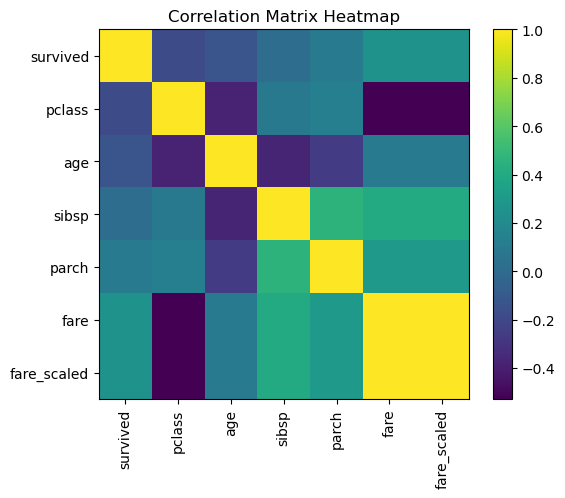

In [24]:
plt.figure()
plt.imshow(corr_matrix)
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Correlation Matrix Heatmap")
plt.colorbar()
plt.show()